__<p style="font-size:180%;">Pythonøving 3 - TKT4118/MEKT1101 Mekanikk 1</p>__

__Stav og kloss 2__

****
Figuren viser den samme stanga AB og klossen som ble behandlet i den forrige Pythonøvingen. Da neglisjerte vi friksjon mellom klossen og underlaget samt mellom klossen og stanga i punkt D. Nå skal foreta en litt mer realistisk analyse av nødvendig kraft for å skyve klossen langsomt mot venstre med konstant hastighet. Friksjonskoeffisienten er $µ = 0.25$ i alle kontaktpunkter (under klossen og i D). Leddlager A antas å være friksjonsfritt. Stang AB har lengde $L_{AB} = 1000$ mm, og klossen har høyde $h = 400$ mm. Massen til stang AB er stadig $m_s = 10$ kg, mens klossen har masse $m_k = 2$ kg. Sett $g = 9.8 \text{ m/s}^2$.

Denne gangen skal dere også importere funksjonsbibliotekene, og definere konstantene dere trenger selv. Her kan dere selvsagt la dere inspirere av forrige øving om dere ønsker.

<font color='red'>Før du starter kan det lønne seg å trykke: "Run" $\rightarrow$ "Run All Cells".</font>

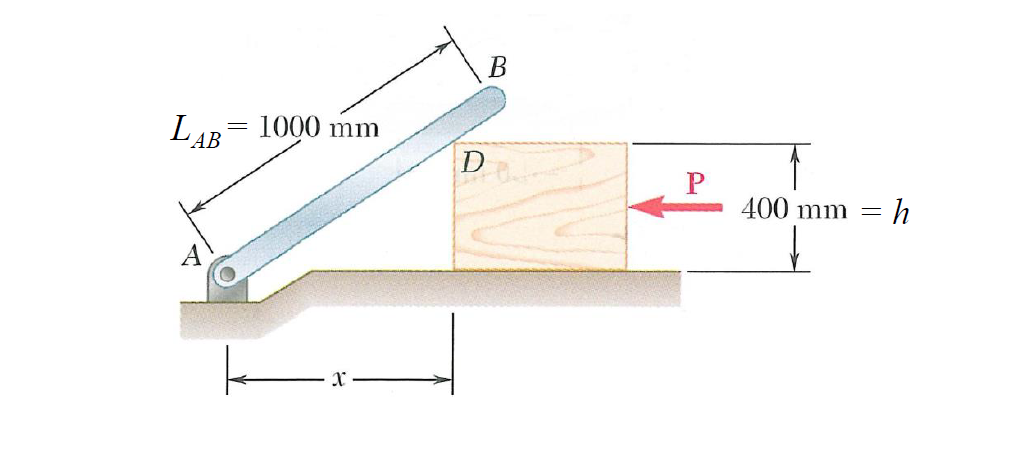

****

<div class="alert alert-success">

Begynn med å importere bibliotekene NumPy og Matplotlib.pyplot i cellen under.


Definer så nødvendige konstanter (Lengde på staven, gravitasjonskonstant, massene, friksjonskoeffisienter osv.).

</div>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

my=0.25
L_AB=1000.0
g=9.8
h=400.0
m_s=10.0
m_k=4.0

****
Vi må nå definere to uttrykk for kraften $P$, med og uten friksjon.

Uten friksjon: 
\begin{equation*}
P = \frac{L_{AB} \cdot h \cdot m_{s}g  }{2(x^2+h^2)^{3/2}} \cdot x
\end{equation*}

Med friksjon: 
\begin{equation*}
P = \frac{\big[2\mu x + (1-\mu^2)h\big] L_{AB}\cdot x}{2(x^2+h^2)^{3/2}}\cdot m_s g-\mu \cdot m_k g 
\end{equation*}

****

<div class="alert alert-success">
I de tre påfølgende kodecellene skal dere regne ut kraften $P$ for verdier av $x$ mellom 50 og 750 mm. Videre skal maks kraft og tilhørende avstand $x$ finnes (slik som i pythonøving 2).

Dette skal gjøres \underline{både} for modellen med og uten friksjon.

Fire viktige deloppgaver er:
* Definer et array (numpy-liste) for $x$.
* Regn ut kraften $P$ for alle verdier av $x$. 
* Finn maksverdien av $P$.
* Finn verdien av $x$ som gir maksimal kraft.


Benytt kodecellen under:


</div>

In [6]:
x=np.arange(50,750)

def P_utenfrik(x):
    return (L_AB*h*m_s*g*x)/(2*(x**2+h**2)**(3/2))

def P_medfrik(x):
    return ((2*my*x+(1-my**2)*h)*L_AB*x)*(m_s*g-my*m_k*g)/(2*(x**2+h**2)**(3/2))

utenfrik=np.array(P_utenfrik(x))
P_utenfrik_max=np.max(P_utenfrik(x))
x_utenfrik=np.argmax(P_utenfrik(x))
print(f"P uten friksjon er {P_utenfrik_max}N på sitt største, noe som skjer ved x={x_utenfrik}mm")

medfrik=np.array(P_medfrik(x))
P_medfrik_max=np.max(P_medfrik(x))
x_medfrik=np.argmax(P_medfrik(x))
print(f"P med friksjon er {P_medfrik_max}N på sitt største, noe som skjer ved x={x_medfrik}mm")

P uten friksjon er 47.15026226745819N på sitt største, noe som skjer ved x=233mm
P med friksjon er 56.54487306369995N på sitt største, noe som skjer ved x=305mm


<div class="alert alert-block alert-info">
<details>
    
<b><summary>Trykk her for hjelp</summary></b> 

<p> Når vi bruker et array (numpyliste) kan vi enkelt multiplisere det med konstanter og andre arrays, eller opphøye hvert element uten å måtte iterere over listen: 

> $numpy\_array$ = np.arange("Start","Stop","Steglengde")
> 
> $maxverdi$ = np.max( $numpy\_liste$ )
> 
> $indeks\_for\_maxverdi$ = np.argmax($numpy\_liste$)
> 
> Husk at spørsmålet er å finne verdien av $x$ som gir maksimal kraft $P$, ikke indeksen.

 </p>
</details>
</div>

<div class="alert alert-success">

Plot sammenhengen for avstanden mellom stav og kloss, $x$, og kraften, $P$, for tilfellene med og uten friksjon. Merk også på grafen hvor maksimal kraft oppstår i begge tilfeller.


</div>

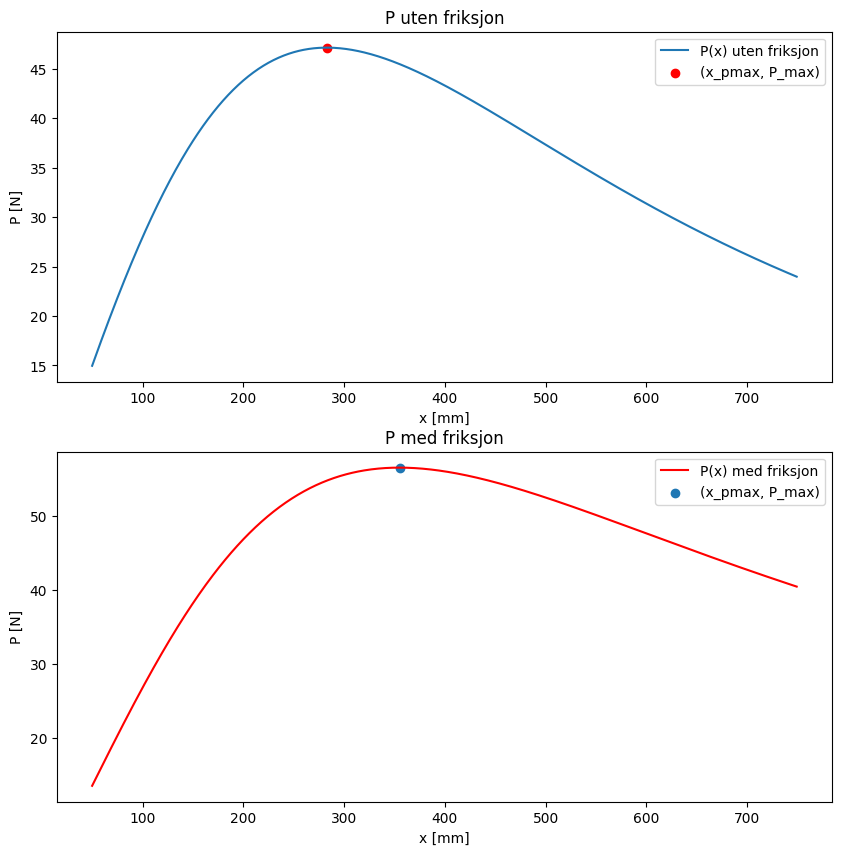

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(x, P_utenfrik(x), label="P(x) uten friksjon")
plt.scatter(x[x_utenfrik], P_utenfrik_max, color='red', label="(x_pmax, P_max)")
plt.xlabel("x [mm]")
plt.ylabel("P [N]")
plt.legend()
plt.title('P uten friksjon')

plt.subplot(2, 1, 2)
plt.plot(x, P_medfrik(x), color='red', label="P(x) med friksjon")
plt.scatter(x[x_medfrik], P_medfrik_max, label="(x_pmax, P_max)")
plt.xlabel("x [mm]")
plt.ylabel("P [N]")
plt.legend()
plt.title('P med friksjon')

plt.show()

<div class="alert alert-block alert-info">
<details>
    
<b><summary>Trykk her for omtrent maksverdi, og for litt plottehjelp:</summary></b> 

<p> 
Uten friksjon,  $P_{maks}\approx 47 \text{N}$

Med friksjon,  $P_{maks}\approx 58 \text{N}$

```python
# Her er en alternativ måte dere kan lage en legend på! Slik er det lettere å velge akkurat hvilke plot som skal merkes.
plt.plot(x1,y1, label=" Merkelapp 1 ")      # Linje nr. 1
plt.plot(x2,y2, label=" Merkelapp 2")      # Linje nr. 2
plt.plot(x3,y3,'o')                        # Plotte med sirkler (maksverdi)
plt.xlabel(" navn på x-akse ")
plt.ylabel(" navn på y-akse ")
plt.legend()
plt.title('Passende tittel')
plt.show()
```

</p>
</details>
</div>

****